<a href="https://colab.research.google.com/github/baroncurtin2/r_coding_exercise/blob/main/Riskified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Riskified Coding Test

The dataframe attached has records of 1,000 objects with 3 columns:

1. shape - square, triangle (equilateral) or circle

2. color - blue, red, green or yellow

3. area - area size in square inches

In [ ]:
%matplotlib inline

# standard imports
from pathlib import Path

# third party imports
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = Path('data.csv')
data = pd.read_csv(data_path, header=0)

## Exploration

In [ ]:
data.shape

(1000, 3)

In [ ]:
data.head()

,shape,color,area
0,square,yellow,"9,409.00"
1,circle,yellow,"4,071.50"
2,triangle,blue,"2,028.00"
3,square,blue,"3,025.00"
4,square,blue,"9,216.00"


In [ ]:
data.tail()

,shape,color,area
995,square,green,81.00
996,square,yellow,"4,624.00"
997,circle,green,"24,884.60"
998,square,yellow,"7,396.00"
999,circle,red,"15,836.80"


# Questions

1. Draw a boxplot showing the area size distribution for each shape.

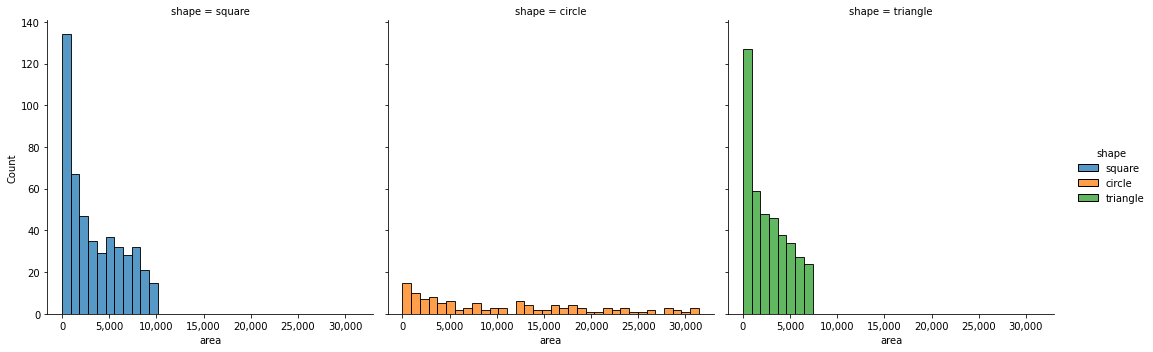

In [ ]:
from matplotlib.ticker import FuncFormatter

boxplots = sns.displot(data=data, x='area', col='shape', hue='shape')

for ax in boxplots.axes.flat:
  ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))

2. Calculate the mean, max, and standard deviation of the area size of each color.

In [ ]:
q2 = data.groupby('color')['area'].agg(['mean', 'max', 'std']).reset_index()
q2

,color,mean,max,std
0,blue,"3,208.13","21,642.40","3,039.21"
1,green,"5,761.12","27,759.10","6,695.03"
2,red,"3,815.87","31,415.90","5,092.68"
3,yellow,"4,538.21","31,415.90","5,352.46"


3. What is the average area size of a yellow square?

In [ ]:
q3 = data[(data['color'] == 'yellow') & (data['shape'] == 'square')]['area'].mean()

print(f'The average size of the area of a yellow square is {q3:,.2f} square inches.')

The average size of the area of a yellow square is 3,333.21 square inches.


4. Which shape is most likely to be green?

In [ ]:
# count of each shape color grouping
q4 = data.groupby(['shape', 'color']).size().reset_index(name='count')

# count of all items within shape
q4['total'] = q4.groupby('shape')['count'].transform('sum')

# create ratio column
q4['percent'] = q4['count'] / q4['total']
q4 = q4.sort_values(['shape', 'percent'], ascending=[True, False])

# get max percent (most likely green)
green = q4[q4['color'] == 'green']
most_likely = green[green['percent'] == green['percent'].max()]

print(f'The shape most likely to be green is [{most_likely.at[1, "shape"]}].')


The shape most likely to be green is [circle].


5. Given the fact that the object is red, with an area size larger than 3,000 - what are the chances the object is a square? a triangle? a circle?


In [ ]:
# filter for red and area > 3000
q5 = data[(data['color'] == 'red') & (data['area'] > 3000)]

# get red count > 3000 by shape
q5 = q5.groupby('shape').size().reset_index(name='count')

# get total count of all objects that are red and have an area > 3000
q5['total'] = q5['count'].sum()

# get ratio
q5['percent'] = q5['count'] / q5['total']
q5

,shape,count,total,percent
0,circle,20,125,0.16
1,square,21,125,0.17
2,triangle,84,125,0.67


6. Write a function that calculates the side or radius of an object, depending on the shape and area of the object [for an equilateral triangle - area = (side ^ 2) * sqrt(3) / 4].


In [ ]:
from math import pi, sqrt

def square_side_from_area(area):
  return sqrt(area)

def circle_radius_from_area(area):
  # a = pi * r**2
  r = sqrt(area / pi)
  return r

def triangle_side_from_area(area):
  # area = (side ^ 2) * sqrt(3) / 4
  side = sqrt(area * 4 / sqrt(3))
  return side

def calculate_side_or_r(shape, area):
  calculator = {
      'square':  square_side_from_area,
      'circle': circle_radius_from_area,
      'triangle': triangle_side_from_area
  }

  return calculator[shape](area)


7. Add a column to the dataset called "side" that shows the size matching the area in each row, round that number to the closest integer (shape side or radius).

In [ ]:
data['side'] = data.apply(lambda x: calculate_side_or_r(x['shape'], x['area']), axis=1).round()
data

,shape,color,area,side
0,square,yellow,"9,409.00",97.00
1,circle,yellow,"4,071.50",36.00
2,triangle,blue,"2,028.00",68.00
3,square,blue,"3,025.00",55.00
4,square,blue,"9,216.00",96.00
...,...,...,...,...
995,square,green,81.00,9.00
996,square,yellow,"4,624.00",68.00
997,circle,green,"24,884.60",89.00
998,square,yellow,"7,396.00",86.00


8. Draw a boxplot showing the side size distribution for each shape - what can you infer from this plot?

<Figure size 720x576 with 0 Axes>

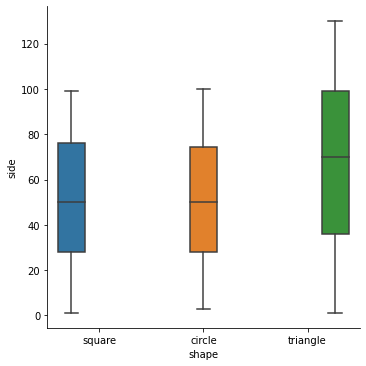

In [ ]:
plt.figure(figsize=(10, 8))
g = sns.catplot(data=data, x='shape', y='side', hue='shape', kind='box')

From this set of boxplots, it can be inferred that the triangles in this dataset generally have longer sides than the sides of squares and the radii of the circles. The median triangle side is larger than both the median circle radius and the square side. There is also a higher variance in the sizes of triangles than that of squares or circles.

9. Make a scatter plot with "side" on the x axis, "area" on the y axis with a different color for each shape.

[Text(0, 0, '-5,000'),
 Text(0, 0, '0'),
 Text(0, 0, '5,000'),
 Text(0, 0, '10,000'),
 Text(0, 0, '15,000'),
 Text(0, 0, '20,000'),
 Text(0, 0, '25,000'),
 Text(0, 0, '30,000'),
 Text(0, 0, '35,000')]

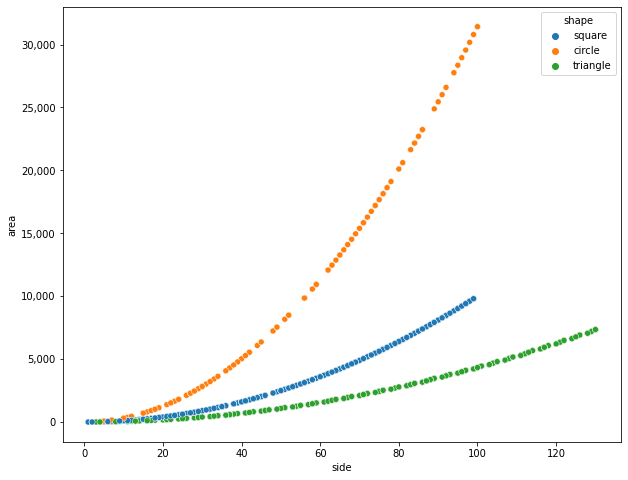

In [ ]:
plt.figure(figsize=(10, 8))
g = sns.scatterplot(x='side', y='area', hue='shape', data=data)
ylabels = [f'{y:,.0f}' for y in g.get_yticks()]
g.set_yticklabels(ylabels)

10. Create a dataframe, table or list that show for each shape:
    
    a. The proportion of red objects within the shape
    
    b. The proportion of blue area out of the shape's total area (sum of square inch blue area of the shape over sum of all shape size).

In [ ]:
ten_a = data.groupby(['shape', 'color']).size().reset_index(name='count')
ten_a['total'] = ten_a.groupby('shape')['count'].transform('sum')
ten_a['percent'] = ten_a['count']/ ten_a['total']

ten_a.set_index('color').loc['red']

,shape,count,total,percent
color,,,,
red,circle,30,120,0.25
red,square,56,477,0.12
red,triangle,204,403,0.51


In [ ]:
ten_b = data.groupby(['shape', 'color'])['area'].sum().reset_index()
ten_b['total'] = ten_b.groupby('shape')['area'].transform('sum')
ten_b['percent'] = ten_b['area']/ ten_b['total']

ten_b.set_index('color').loc['blue']

,shape,area,total,percent
color,,,,
blue,circle,"78,665.40","1,284,417.90",0.06
blue,square,"586,415.00","1,627,190.00",0.36
blue,triangle,"489,847.00","1,033,682.00",0.47


11. Create a function that calculates 10. b. for a given shape and color.

In [ ]:
def calculate_area_proportion(shape, color, data=data):
  # assumption of using the full data set
  _df = data.groupby(['shape', 'color'])['area'].sum().reset_index()

  # filter for shape
  _df = _df[(_df['shape'] == shape)]

  # create total
  _df['total'] = _df.groupby('shape')['area'].transform('sum')

  # create percent
  _df['percent'] = _df['area']/ _df['total']

  # return specified propotion
  percent = _df.set_index('color').at[color, 'percent']
  print(f'The proportion of {color} area out of the {shape}\'s total area is {percent:.2%}.')
  return percent

In [ ]:
calculate_area_proportion('circle', 'blue')

The proportion of blue area out of the circle's total area is 6.12%.


0.06124595429571636